<a href="https://colab.research.google.com/github/manishmcsa/Assigment-6/blob/main/Training_model_GBN_L1_L2_NoL1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Ass6"

/content/drive/MyDrive/Ass6


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [4]:
from batchnorm import BatchNorm as BN
from model_gbn import Net
from model_train import train
from model_test import test
from model_run import run

import model_gbn
import batchnorm
import model_train
import model_test
import model_run

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# without l1&L2
test_losses, test_acc, misclassified_imgs = run(l1_decay=0.0, l2_decay=0.0)

  0%|          | 0/1875 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 2/1875 [00:00<02:02, 15.34it/s]


Test set: Average loss: 0.0580, Accuracy: 9807/10000 (98.07%)

EPOCH: 2


  0%|          | 2/1875 [00:00<02:03, 15.15it/s]


Test set: Average loss: 0.0340, Accuracy: 9894/10000 (98.94%)

EPOCH: 3


  0%|          | 2/1875 [00:00<02:03, 15.15it/s]


Test set: Average loss: 0.0344, Accuracy: 9886/10000 (98.86%)

EPOCH: 4


  0%|          | 2/1875 [00:00<02:20, 13.34it/s]


Test set: Average loss: 0.0302, Accuracy: 9908/10000 (99.08%)

EPOCH: 5


  0%|          | 2/1875 [00:00<02:03, 15.18it/s]


Test set: Average loss: 0.0291, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


  0%|          | 2/1875 [00:00<02:02, 15.35it/s]


Test set: Average loss: 0.0343, Accuracy: 9887/10000 (98.87%)

EPOCH: 7


  0%|          | 2/1875 [00:00<02:02, 15.26it/s]


Test set: Average loss: 0.0274, Accuracy: 9913/10000 (99.13%)

EPOCH: 8


  0%|          | 2/1875 [00:00<02:00, 15.49it/s]


Test set: Average loss: 0.0264, Accuracy: 9909/10000 (99.09%)

EPOCH: 9


  0%|          | 2/1875 [00:00<02:07, 14.70it/s]


Test set: Average loss: 0.0344, Accuracy: 9892/10000 (98.92%)

EPOCH: 10


  0%|          | 2/1875 [00:00<02:08, 14.62it/s]


Test set: Average loss: 0.0229, Accuracy: 9923/10000 (99.23%)

EPOCH: 11


  0%|          | 2/1875 [00:00<02:02, 15.33it/s]


Test set: Average loss: 0.0223, Accuracy: 9932/10000 (99.32%)

EPOCH: 12


  0%|          | 2/1875 [00:00<02:10, 14.35it/s]


Test set: Average loss: 0.0221, Accuracy: 9928/10000 (99.28%)

EPOCH: 13


  0%|          | 2/1875 [00:00<02:03, 15.14it/s]


Test set: Average loss: 0.0265, Accuracy: 9910/10000 (99.10%)

EPOCH: 14


  0%|          | 2/1875 [00:00<02:03, 15.15it/s]


Test set: Average loss: 0.0250, Accuracy: 9915/10000 (99.15%)

EPOCH: 15


  0%|          | 2/1875 [00:00<02:11, 14.29it/s]


Test set: Average loss: 0.0227, Accuracy: 9926/10000 (99.26%)

EPOCH: 16


  0%|          | 2/1875 [00:00<02:04, 15.04it/s]


Test set: Average loss: 0.0257, Accuracy: 9919/10000 (99.19%)

EPOCH: 17


  0%|          | 2/1875 [00:00<02:02, 15.25it/s]


Test set: Average loss: 0.0228, Accuracy: 9924/10000 (99.24%)

EPOCH: 18


  0%|          | 2/1875 [00:00<02:05, 14.92it/s]


Test set: Average loss: 0.0213, Accuracy: 9932/10000 (99.32%)

EPOCH: 19


  0%|          | 2/1875 [00:00<02:05, 14.90it/s]


Test set: Average loss: 0.0200, Accuracy: 9925/10000 (99.25%)

EPOCH: 20


  0%|          | 2/1875 [00:00<02:01, 15.37it/s]


Test set: Average loss: 0.0243, Accuracy: 9923/10000 (99.23%)

EPOCH: 21


  0%|          | 2/1875 [00:00<02:04, 15.07it/s]


Test set: Average loss: 0.0239, Accuracy: 9917/10000 (99.17%)

EPOCH: 22


  0%|          | 2/1875 [00:00<02:03, 15.14it/s]


Test set: Average loss: 0.0182, Accuracy: 9936/10000 (99.36%)

EPOCH: 23


  0%|          | 2/1875 [00:00<02:03, 15.13it/s]


Test set: Average loss: 0.0223, Accuracy: 9922/10000 (99.22%)

EPOCH: 24


  0%|          | 2/1875 [00:00<02:01, 15.40it/s]


Test set: Average loss: 0.0214, Accuracy: 9924/10000 (99.24%)

EPOCH: 25


100%|██████████| 1875/1875 [02:04<00:00, 15.02it/s]
/content/drive/My Drive/Ass6/model_test.py:35: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]



Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)



In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_misclassified_images(img_data, img_name):
  figure = plt.figure(figsize=(10, 10))
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img_data[index-1]["img"], cmap='gray_r')
      plt.title("Predicted: %s\nActual: %s" % (img_data[index-1]["pred"], img_data[index-1]["target"]))
  plt.tight_layout()
  plt.savefig(img_name)

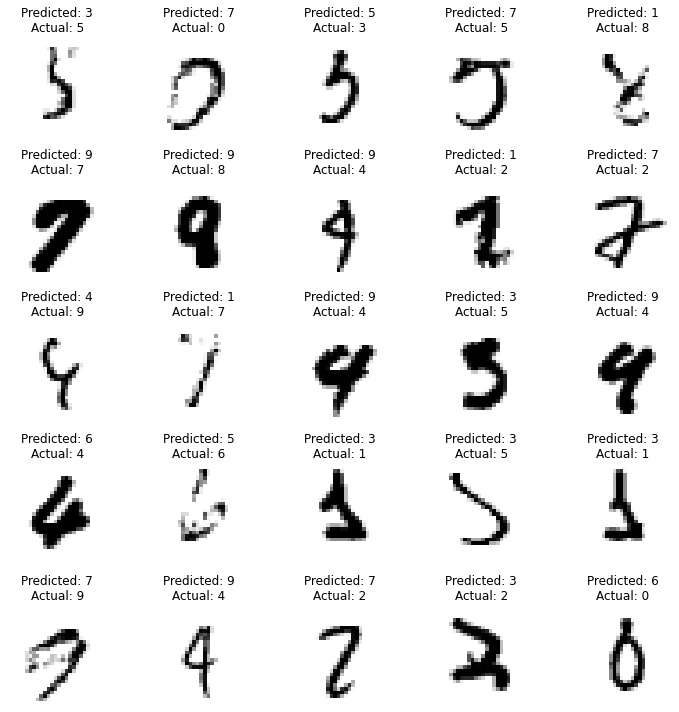

In [7]:
# without l1&L2
plot_misclassified_images(misclassified_imgs, "misclassified_imgs_l1.png")

In [8]:
# with l1
test_losses_l1, test_acc_l1, misclassified_imgs_l1 = run(l1_decay=0.0005, l2_decay=0.0)

  0%|          | 2/1875 [00:00<02:19, 13.39it/s]

EPOCH: 1


  0%|          | 2/1875 [00:00<02:11, 14.26it/s]


Test set: Average loss: 0.0502, Accuracy: 9854/10000 (98.54%)

EPOCH: 2


  0%|          | 2/1875 [00:00<02:13, 14.06it/s]


Test set: Average loss: 0.0978, Accuracy: 9706/10000 (97.06%)

EPOCH: 3


  0%|          | 2/1875 [00:00<02:03, 15.14it/s]


Test set: Average loss: 0.0949, Accuracy: 9724/10000 (97.24%)

EPOCH: 4


  0%|          | 2/1875 [00:00<02:04, 15.00it/s]


Test set: Average loss: 0.1015, Accuracy: 9682/10000 (96.82%)

EPOCH: 5


  0%|          | 2/1875 [00:00<02:14, 13.97it/s]


Test set: Average loss: 0.0674, Accuracy: 9810/10000 (98.10%)

EPOCH: 6


  0%|          | 2/1875 [00:00<02:04, 15.02it/s]


Test set: Average loss: 0.1043, Accuracy: 9673/10000 (96.73%)

EPOCH: 7


  0%|          | 2/1875 [00:00<02:06, 14.83it/s]


Test set: Average loss: 0.1358, Accuracy: 9572/10000 (95.72%)

EPOCH: 8


  0%|          | 2/1875 [00:00<02:09, 14.48it/s]


Test set: Average loss: 0.1177, Accuracy: 9665/10000 (96.65%)

EPOCH: 9


  0%|          | 2/1875 [00:00<02:05, 14.93it/s]


Test set: Average loss: 0.1689, Accuracy: 9472/10000 (94.72%)

EPOCH: 10


  0%|          | 2/1875 [00:00<02:04, 15.06it/s]


Test set: Average loss: 0.2732, Accuracy: 9015/10000 (90.15%)

EPOCH: 11


  0%|          | 2/1875 [00:00<02:10, 14.33it/s]


Test set: Average loss: 0.0957, Accuracy: 9717/10000 (97.17%)

EPOCH: 12


  0%|          | 2/1875 [00:00<02:05, 14.98it/s]


Test set: Average loss: 0.1294, Accuracy: 9574/10000 (95.74%)

EPOCH: 13


  0%|          | 2/1875 [00:00<02:07, 14.66it/s]


Test set: Average loss: 0.1379, Accuracy: 9576/10000 (95.76%)

EPOCH: 14


  0%|          | 2/1875 [00:00<02:06, 14.85it/s]


Test set: Average loss: 0.0944, Accuracy: 9727/10000 (97.27%)

EPOCH: 15


  0%|          | 2/1875 [00:00<02:07, 14.73it/s]


Test set: Average loss: 0.0907, Accuracy: 9708/10000 (97.08%)

EPOCH: 16


  0%|          | 2/1875 [00:00<02:03, 15.16it/s]


Test set: Average loss: 0.1198, Accuracy: 9631/10000 (96.31%)

EPOCH: 17


  0%|          | 2/1875 [00:00<02:06, 14.85it/s]


Test set: Average loss: 0.1187, Accuracy: 9614/10000 (96.14%)

EPOCH: 18


  0%|          | 2/1875 [00:00<02:18, 13.52it/s]


Test set: Average loss: 0.0877, Accuracy: 9714/10000 (97.14%)

EPOCH: 19


  0%|          | 2/1875 [00:00<02:04, 15.07it/s]


Test set: Average loss: 0.0879, Accuracy: 9719/10000 (97.19%)

EPOCH: 20


  0%|          | 2/1875 [00:00<02:06, 14.77it/s]


Test set: Average loss: 0.1165, Accuracy: 9618/10000 (96.18%)

EPOCH: 21


  0%|          | 2/1875 [00:00<02:21, 13.24it/s]


Test set: Average loss: 0.0792, Accuracy: 9744/10000 (97.44%)

EPOCH: 22


  0%|          | 2/1875 [00:00<02:10, 14.33it/s]


Test set: Average loss: 0.1087, Accuracy: 9663/10000 (96.63%)

EPOCH: 23


  0%|          | 2/1875 [00:00<02:04, 15.00it/s]


Test set: Average loss: 0.0841, Accuracy: 9750/10000 (97.50%)

EPOCH: 24


  0%|          | 2/1875 [00:00<02:13, 14.06it/s]


Test set: Average loss: 0.0820, Accuracy: 9744/10000 (97.44%)

EPOCH: 25


100%|██████████| 1875/1875 [02:07<00:00, 14.69it/s]



Test set: Average loss: 0.0837, Accuracy: 9713/10000 (97.13%)



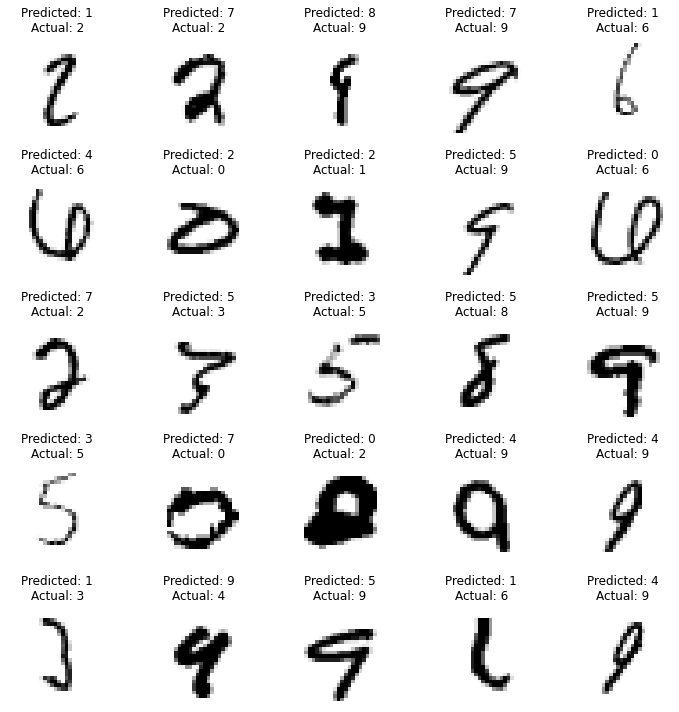

In [9]:
# with L1
plot_misclassified_images(misclassified_imgs_l1, "misclassified_imgs_l1.png")

In [6]:
# with l2
test_losses_l2, test_acc_l2, misclassified_imgs_l2 = run(l1_decay=0.0, l2_decay=0.0003)

  0%|          | 0/1875 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 2/1875 [00:00<02:10, 14.37it/s]


Test set: Average loss: 0.0531, Accuracy: 9834/10000 (98.34%)

EPOCH: 2


  0%|          | 2/1875 [00:00<02:09, 14.48it/s]


Test set: Average loss: 0.0499, Accuracy: 9845/10000 (98.45%)

EPOCH: 3


  0%|          | 2/1875 [00:00<02:19, 13.47it/s]


Test set: Average loss: 0.0370, Accuracy: 9878/10000 (98.78%)

EPOCH: 4


  0%|          | 2/1875 [00:00<02:11, 14.24it/s]


Test set: Average loss: 0.0321, Accuracy: 9904/10000 (99.04%)

EPOCH: 5


  0%|          | 2/1875 [00:00<02:14, 13.88it/s]


Test set: Average loss: 0.0301, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


  0%|          | 2/1875 [00:00<02:15, 13.87it/s]


Test set: Average loss: 0.0329, Accuracy: 9898/10000 (98.98%)

EPOCH: 7


  0%|          | 2/1875 [00:00<02:09, 14.45it/s]


Test set: Average loss: 0.0281, Accuracy: 9912/10000 (99.12%)

EPOCH: 8


  0%|          | 2/1875 [00:00<02:10, 14.37it/s]


Test set: Average loss: 0.0347, Accuracy: 9895/10000 (98.95%)

EPOCH: 9


  0%|          | 2/1875 [00:00<02:08, 14.58it/s]


Test set: Average loss: 0.0271, Accuracy: 9906/10000 (99.06%)

EPOCH: 10


  0%|          | 2/1875 [00:00<02:07, 14.66it/s]


Test set: Average loss: 0.0281, Accuracy: 9904/10000 (99.04%)

EPOCH: 11


  0%|          | 2/1875 [00:00<02:16, 13.74it/s]


Test set: Average loss: 0.0313, Accuracy: 9898/10000 (98.98%)

EPOCH: 12


  0%|          | 2/1875 [00:00<02:12, 14.12it/s]


Test set: Average loss: 0.0308, Accuracy: 9902/10000 (99.02%)

EPOCH: 13


  0%|          | 2/1875 [00:00<02:15, 13.82it/s]


Test set: Average loss: 0.0289, Accuracy: 9911/10000 (99.11%)

EPOCH: 14


  0%|          | 2/1875 [00:00<02:07, 14.74it/s]


Test set: Average loss: 0.0243, Accuracy: 9914/10000 (99.14%)

EPOCH: 15


  0%|          | 2/1875 [00:00<02:07, 14.65it/s]


Test set: Average loss: 0.0305, Accuracy: 9907/10000 (99.07%)

EPOCH: 16


  0%|          | 2/1875 [00:00<02:13, 14.06it/s]


Test set: Average loss: 0.0293, Accuracy: 9901/10000 (99.01%)

EPOCH: 17


  0%|          | 2/1875 [00:00<02:08, 14.62it/s]


Test set: Average loss: 0.0235, Accuracy: 9925/10000 (99.25%)

EPOCH: 18


  0%|          | 2/1875 [00:00<02:13, 14.07it/s]


Test set: Average loss: 0.0298, Accuracy: 9907/10000 (99.07%)

EPOCH: 19


  0%|          | 2/1875 [00:00<02:08, 14.55it/s]


Test set: Average loss: 0.0239, Accuracy: 9926/10000 (99.26%)

EPOCH: 20


  0%|          | 2/1875 [00:00<02:20, 13.30it/s]


Test set: Average loss: 0.0273, Accuracy: 9913/10000 (99.13%)

EPOCH: 21


  0%|          | 2/1875 [00:00<02:08, 14.54it/s]


Test set: Average loss: 0.0264, Accuracy: 9912/10000 (99.12%)

EPOCH: 22


  0%|          | 2/1875 [00:00<02:16, 13.76it/s]


Test set: Average loss: 0.0249, Accuracy: 9923/10000 (99.23%)

EPOCH: 23


  0%|          | 2/1875 [00:00<02:09, 14.45it/s]


Test set: Average loss: 0.0258, Accuracy: 9914/10000 (99.14%)

EPOCH: 24


  0%|          | 2/1875 [00:00<02:10, 14.38it/s]


Test set: Average loss: 0.0267, Accuracy: 9907/10000 (99.07%)

EPOCH: 25


100%|██████████| 1875/1875 [02:13<00:00, 14.00it/s]
/content/drive/My Drive/Ass6/model_test.py:35: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]



Test set: Average loss: 0.0271, Accuracy: 9908/10000 (99.08%)



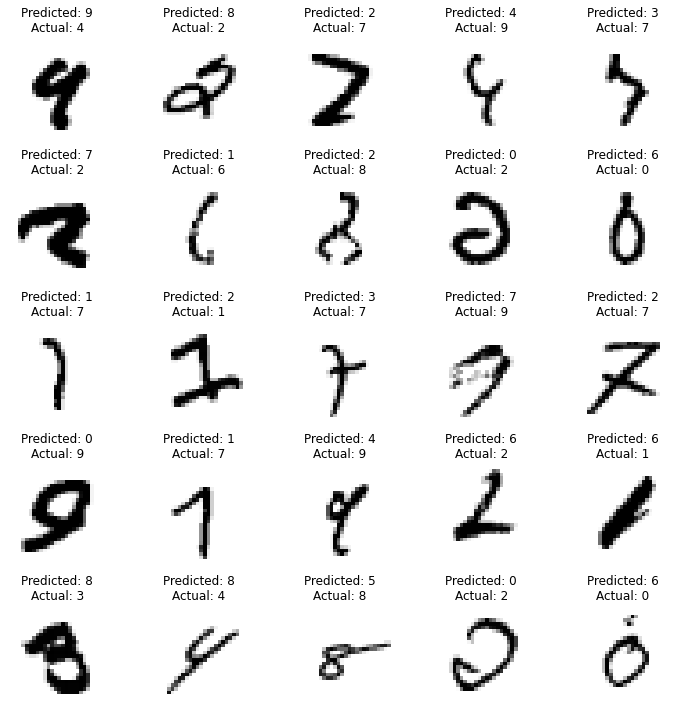

In [7]:
# with L2
plot_misclassified_images(misclassified_imgs_l2, "misclassified_imgs_l1.png")